In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import math

In [2]:
bank_data = pd.read_csv('bank-full.csv', index_col=None, delimiter=';')


In [3]:
bank_data['target'] = bank_data['y'].map({'yes': 0, 'no':1})
bank_data.drop(['y'], axis=1, inplace=True)

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [7]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target        int64
dtype: object

In [8]:
bank_data.duplicated().sum()

0

In [9]:
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize=True).reset_index()
    n_colors = len(variable_df)
    variable_df.set_index('index').T.plot(kind='barh',
                                        stacked=True,
                                        colormap=ListedColormap(sns.color_palette("Set2", n_colors)),
                                        width=0.15, ax=ax)

def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12,n_rows*3))

    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows,2,i+1)
        eda_categorical(data, variable, ax=ax)
    
    plt.tight_layout()
    plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', 7)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, orient='v', palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

In [10]:
continuous, categorical = [], []

for col in [c for c in bank_data.columns if c != 'target']:
    if is_numeric_dtype(bank_data[col]):
        continuous.append(col)
    else:
        categorical.append(col)

In [11]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
continuous

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Visualize the Target column

In [13]:
n = len(bank_data)
n_not_subscribed = sum(bank_data['target'])
n_subscribe = n - n_not_subscribed

print('Dataset contains %d records' % (n))
print('Number of customers who subscribed: %d (%0.2f%%)' % (n_subscribe, n_subscribe*100/n))
print('Number of customers who have not subscribed: %d (%0.2f%%)' % (n_not_subscribed, n_not_subscribed*100/n))


Dataset contains 45211 records
Number of customers who subscribed: 5289 (11.70%)
Number of customers who have not subscribed: 39922 (88.30%)


<AxesSubplot:xlabel='target', ylabel='count'>

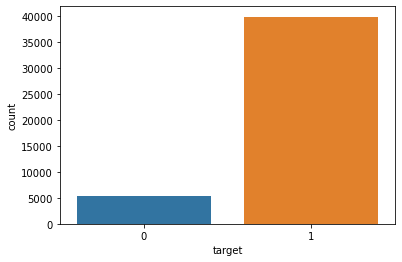

In [14]:
sns.countplot(x='target', data=bank_data)

There are 5289 which is 11.7% of customers have subscribed to the term deposit and around 39,922 which is 88.3% have not subscribed to the term deposit.

## Visualize the categorical values

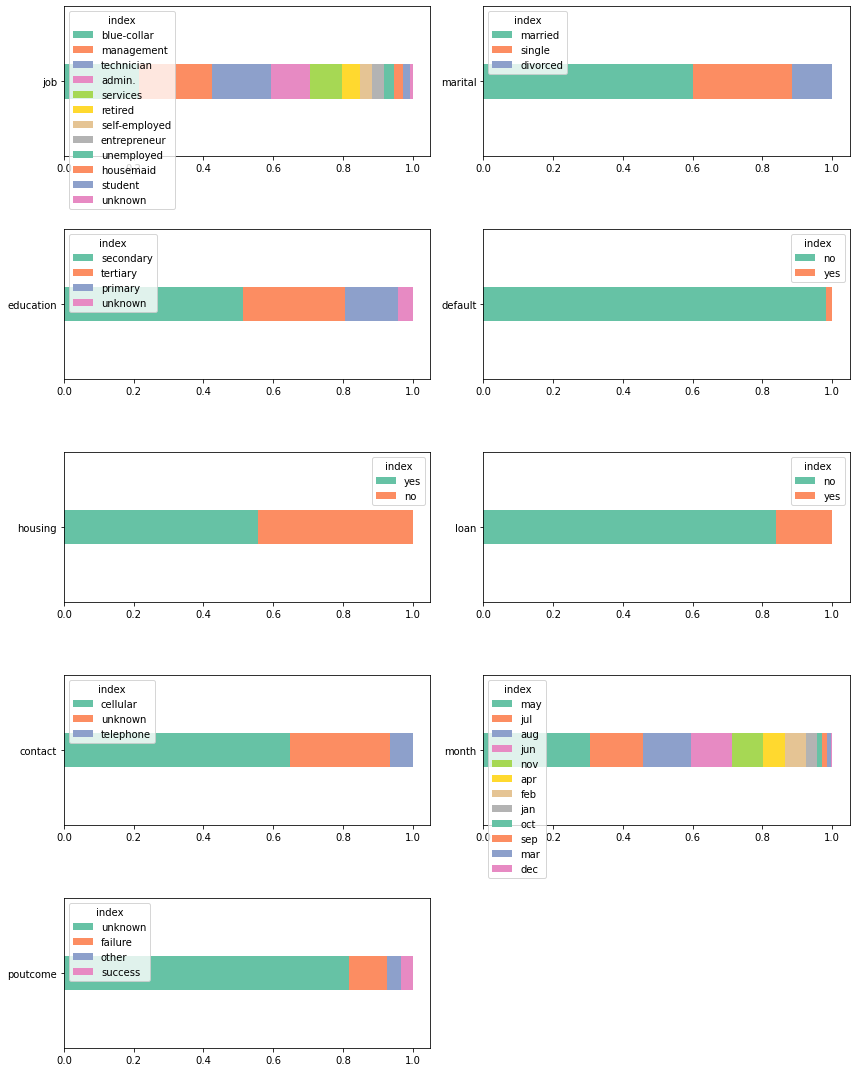

In [15]:
multiple_eda_categorical(bank_data, categorical)

### Interpretation

## Visualize the continuous variables

/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` s

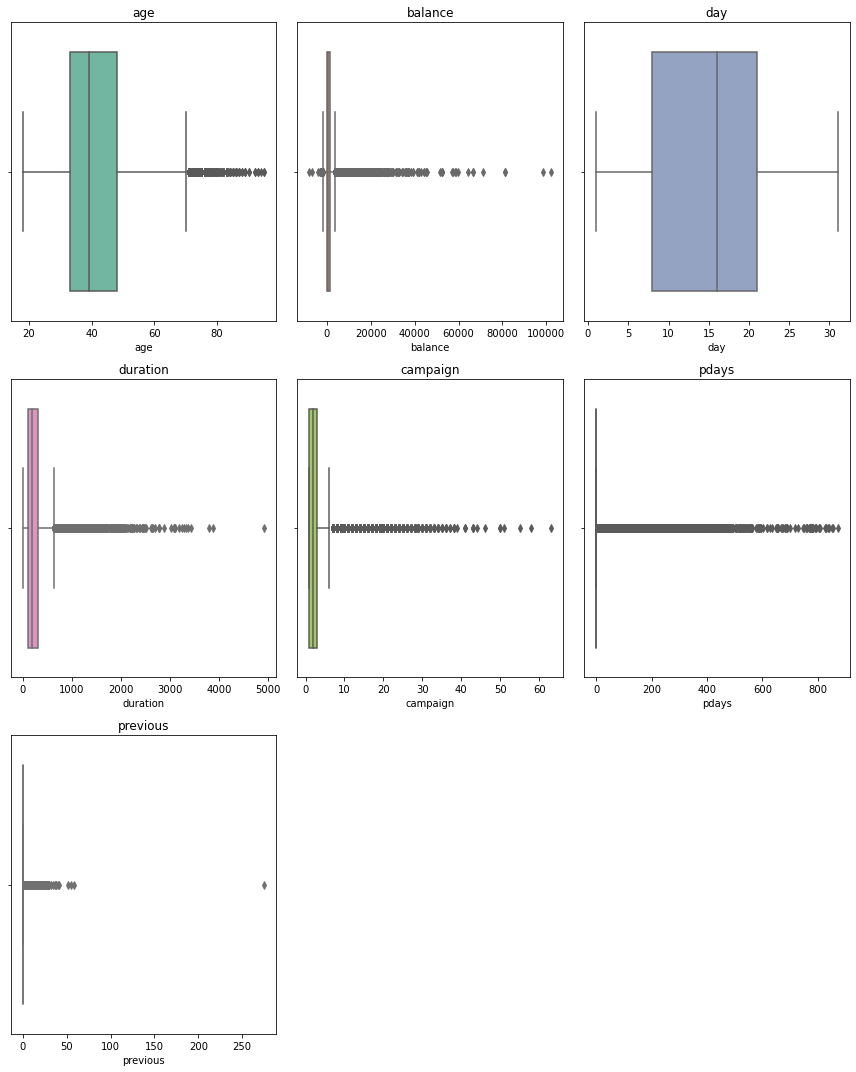

In [16]:
multiple_eda_continuous(bank_data, continuous)


### Interpretation

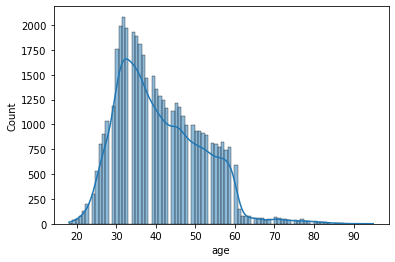

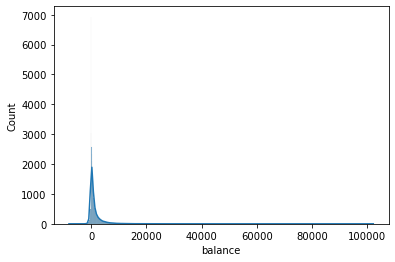

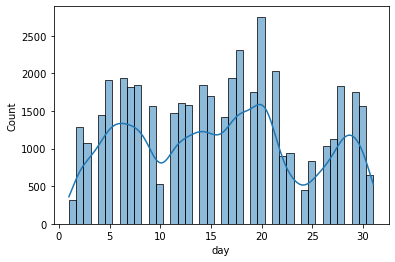

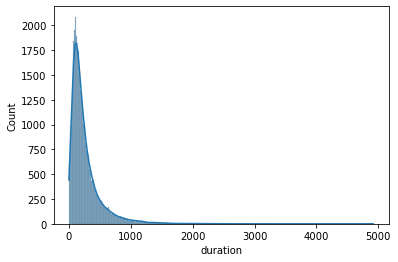

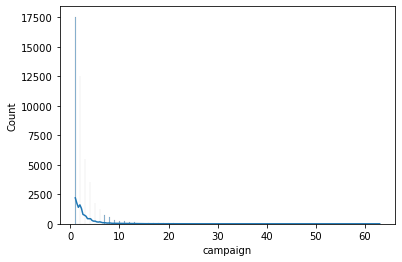

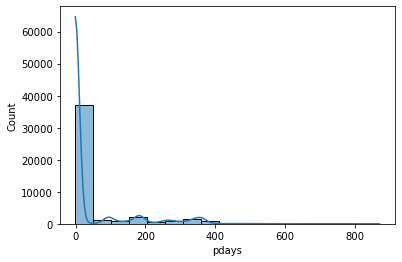

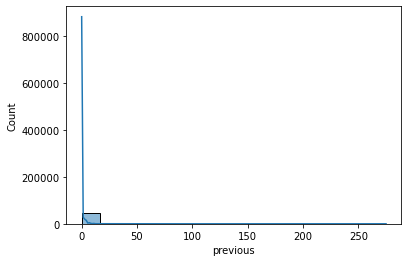

In [17]:
for col in continuous:
    sns.histplot(data=bank_data, x=col, kde=True)
    plt.show()

In [18]:
import pandas as pd
import scipy.stats as stats

class CategoricalFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature

    @property
    def df_lite(self):
        df_lite = self.df
        df_lite['bin'] = df_lite[self.feature].fillna('MISSING')
        return df_lite[['bin', 'target']]


class ContinuousFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature
        self.bin_min_size = int(len(self.df) * 0.05)

    def __generate_bins(self, bins_num):
        df = self.df[[self.feature, 'target']]
        df['bin'] = pd.qcut(df[self.feature], bins_num, duplicates='drop') \
                    .apply(lambda x: x.left) \
                    .astype(float)
        return df

    def __generate_correct_bins(self, bins_max=20):
        for bins_num in range(bins_max, 1, -1):
            df = self.__generate_bins(bins_num)
            df_grouped = pd.DataFrame(df.groupby('bin') \
                                      .agg({self.feature: 'count',
                                            'target': 'sum'})) \
                                      .reset_index()
            r, p = stats.stats.spearmanr(df_grouped['bin'], df_grouped['target'])

            if (
                    abs(r)==1 and                                                        # check if woe for bins are monotonic
                    df_grouped[self.feature].min() > self.bin_min_size                   # check if bin size is greater than 5%
                    and not (df_grouped[self.feature] == df_grouped['target']).any()      # check if number of good and bad is not equal to 0
            ):
                break

        return df

    @property
    def df_lite(self):
        df_lite = self.__generate_correct_bins()
        df_lite['bin'].fillna('MISSING', inplace=True)
        return df_lite[['bin', 'target']]
    

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

class AttributeRelevance():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def bulk_iv(self, feats, iv, woe_extremes=False):
        iv_dict = {}
        for f in feats:
            iv_df, iv_value = iv.calculate_iv(f)
            if woe_extremes:
                iv_dict[f.feature] = [iv_value, iv_df['woe'].min(), iv_df['woe'].max()]
                cols = ['iv', 'woe_min', 'woe_max']
            else:
                iv_dict[f.feature] = iv_value
                cols = ['iv']
        df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=cols)
        return df

    def bulk_stats(self, feats, s):
        stats_dict = {}
        for f in feats:
            p_value, effect_size = s.calculate_chi(f)
            stats_dict[f.feature] = [p_value, effect_size]
        df = pd.DataFrame.from_dict(stats_dict, orient='index', columns=['p-value', 'effect_size'])
        return df

    def analyze(self, feats, iv, s=None, interpretation=False):
        df_iv = self.bulk_iv(feats, iv).sort_values(by='iv', ascending=False)
        if s is not None:
            df_stats = self.bulk_stats(feats, s)
            df_iv = df_iv.merge(df_stats, left_index=True, right_index=True)
        if interpretation:
            df_iv['iv_interpretation'] = df_iv['iv'].apply(iv.interpretation)
            if s is not None:
                df_iv['es_interpretation'] = df_iv['effect_size'].apply(s.interpretation)
        return df_iv

    def draw_iv(self, feats, iv):
        df = self.analyze(feats, iv)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='iv', data=df, palette=self.seq_palette(len(feats)))
        ax.set_title('IV values')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_extremes(self, feats, iv):
        df = self.bulk_iv(feats, iv, woe_extremes=True).sort_values(by='iv', ascending=False)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='woe_min', data=df, palette=self.seq_palette(len(feats)))
        sns.barplot(x=df.index, y='woe_max', data=df, palette=self.seq_palette(len(feats)))
        ax.axhline(y=0, color='black', linewidth=1)
        ax.set_title('Range of WOE values')
        ax.set_ylabel('WOE')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_multiplot(self, feats, iv):
        n = len(feats)
        nrows = int(np.ceil(n/3))
        fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*4))
        for i in range(n):
            iv_df, iv_value = iv.calculate_iv(feats[i])
            sns.barplot(x=feats[i].feature, y='woe', data=iv_df, color='#455872', ax=fig.axes[i])

        for ax in fig.axes:
            plt.sca(ax)
            plt.xticks(rotation=50)

        plt.tight_layout()
        plt.show()

class Analysis():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def group_by_feature(self, feat):
        df = feat.df_lite \
                            .groupby('bin') \
                            .agg({'target': ['count', 'sum']}) \
                            .reset_index()
        df.columns = [feat.feature, 'count', 'good']
        df['bad'] = df['count'] - df['good']
        return df

class StatsSignificance(Analysis):
    def calculate_chi(self, feat):
        df = self.group_by_feature(feat)
        df_chi = np.array(df[['good', 'bad']])
        n = df['count'].sum()

        chi = stats.chi2_contingency(df_chi)
        cramers_v = np.sqrt(chi[0] / n)          # assume that k=2 (good, bad)
        return chi[1], cramers_v

    @staticmethod
    def interpretation(cramers_v):
        if cramers_v < 0.1:
            return 'useless'
        elif cramers_v < 0.2:
            return 'weak'
        elif cramers_v < 0.4:
            return 'medium'
        elif cramers_v < 0.6:
            return 'strong'
        else:
            return 'very strong'

    def interpret_chi(self, feat):
        _, cramers_v = self.calculate_chi(feat)
        return self.interpretation(cramers_v)

    def print_chi(self, feat):
        p_value, cramers_v = self.calculate_chi(feat)
        print('P-value: %0.2f\nEffect size: %0.2f' % (p_value, cramers_v))
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(cramers_v)))


class IV(Analysis):
    @staticmethod
    def __perc_share(df, group_name):
        return df[group_name] / df[group_name].sum()

    def __calculate_perc_share(self, feat):
        df = self.group_by_feature(feat)
        df['perc_good'] = self.__perc_share(df, 'good')
        df['perc_bad'] = self.__perc_share(df, 'bad')
        df['perc_diff'] = df['perc_good'] - df['perc_bad']
        return df

    def __calculate_woe(self, feat):
        df = self.__calculate_perc_share(feat)
        df['woe'] = np.log(df['perc_good']/df['perc_bad'])
        df['woe'] = df['woe'].replace([np.inf, -np.inf], np.nan).fillna(0)
        return df

    def calculate_iv(self, feat):
        df = self.__calculate_woe(feat)
        df['iv'] = df['perc_diff'] * df['woe']
        return df, df['iv'].sum()

    def draw_woe(self, feat):
        iv_df, iv_value = self.calculate_iv(feat)
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=feat.feature, y='woe', data=iv_df, palette=self.seq_palette(len(iv_df.index)))
        ax.set_title('WOE visualization for: ' + feat.feature)
        plt.show()
        plt.show()

    @staticmethod
    def interpretation(iv):
        if iv < 0.02:
            return 'useless'
        elif iv < 0.1:
            return 'weak'
        elif iv < 0.3:
            return 'medium'
        elif iv < 0.5:
            return 'strong'
        else:
            return 'suspicious'

    def interpret_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        return self.interpretation(iv)

    def print_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        print('Information value: %0.2f' % iv)
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(iv)))

In [20]:
# age, job, marital, balance, campaign, education, default

In [21]:
feat_job = CategoricalFeature(bank_data, 'job')
feat_age = ContinuousFeature(bank_data, 'age')
feat_marital = CategoricalFeature(bank_data, 'marital')
feat_balance = ContinuousFeature(bank_data, 'balance')

In [22]:
feat_job.df_lite.head()


,bin,target
0,management,1
1,technician,1
2,entrepreneur,1
3,blue-collar,1
4,unknown,1


In [23]:
feat_age.df_lite.head()

,bin,target
0,39.000,1
1,39.000,1
2,17.999,1
3,39.000,1
4,17.999,1


In [24]:
feat_marital.df_lite.head()

,bin,target
0,married,1
1,single,1
2,married,1
3,married,1
4,single,1


In [25]:
feat_balance.df_lite.head()

,bin,target
0,955.000,1
1,2.000,1
2,-8019.001,1
3,955.000,1
4,-8019.001,1


In [26]:
feats_manual = [feat_job, feat_age, feat_marital, feat_balance]


In [27]:
feats_dict = {}

for col in [c for c in bank_data.columns if c != 'target']:
    if is_numeric_dtype(bank_data[col]):
        feats_dict[col] = ContinuousFeature(bank_data, col)
    else:
        feats_dict[col] = CategoricalFeature(bank_data, col)

feats = list(feats_dict.values())

In [28]:
iv = IV()

### Balance column

In [29]:
iv.group_by_feature(feat_balance)


,balance,count,good,bad
0,-8019.001,7631,7096,535
1,2.000,7444,6770,674
2,175.000,7533,6693,840
3,448.000,7533,6616,917
4,955.000,7535,6474,1061
5,2283.000,7535,6273,1262


In [30]:
iv_df, iv_value = iv.calculate_iv(feat_balance)
display(iv_df)
print('Information value: ', iv_value)

,balance,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-8019.001,7631,7096,535,0.177747,0.101153,0.076593,0.563721,0.043177
1,2.000,7444,6770,674,0.169581,0.127434,0.042146,0.285728,0.012042
2,175.000,7533,6693,840,0.167652,0.158820,0.008832,0.054117,0.000478
3,448.000,7533,6616,917,0.165723,0.173379,-0.007656,-0.045160,0.000346
4,955.000,7535,6474,1061,0.162166,0.200605,-0.038439,-0.212716,0.008177
5,2283.000,7535,6273,1262,0.157131,0.238608,-0.081477,-0.417741,0.034036


Information value:  0.0982562136710228


#### Balance is a weak predictor because IV value = 0.09 falls under 0.02 and 0.1

#### Statistical significance of the balance column

In [31]:
s = StatsSignificance()

In [32]:
p_value, effect_size = s.calculate_chi(feat_balance)
print('p-value: %0.2f' % p_value)
print('effect size: %0.2f' % effect_size)

p-value: 0.00
effect size: 0.10


In [33]:
print('%s is a %s predictor.' % (feat_balance.feature.capitalize(), s.interpret_chi(feat_balance)))
print('A feature with effect size = 0.2 is a %s predictor.' % s.interpretation(0.2))
print()
s.print_chi(feat_balance)


Balance is a useless predictor.
A feature with effect size = 0.2 is a medium predictor.

P-value: 0.00
Effect size: 0.10
Balance is a useless predictor


### Marital

In [34]:
iv.group_by_feature(feat_marital)
iv_df, iv_value = iv.calculate_iv(feat_marital)
display(iv_df)
print('Information value: ', iv_value)

,marital,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,divorced,5207,4585,622,0.114849,0.117603,-0.002754,-0.023693,0.000065
1,married,27214,24459,2755,0.612670,0.520892,0.091777,0.162282,0.014894
2,single,12790,10878,1912,0.272481,0.361505,-0.089024,-0.282706,0.025168


Information value:  0.04012659014158408


#### Marital is a weak predictor because IV value = 0.04 falls under 0.02 and 0.1

In [35]:
p_value, effect_size = s.calculate_chi(feat_marital)
print('p-value: %0.2f' % p_value)
print('effect size: %0.2f' % effect_size)

p-value: 0.00
effect size: 0.07


In [36]:
print('%s is a %s predictor.' % (feat_marital.feature.capitalize(), s.interpret_chi(feat_marital)))
print('A feature with effect size = 0.2 is a %s predictor.' % s.interpretation(0.2))
print()
s.print_chi(feat_marital)


Marital is a useless predictor.
A feature with effect size = 0.2 is a medium predictor.

P-value: 0.00
Effect size: 0.07
Marital is a useless predictor


### Attribute Relevance Class

In [37]:
ar = AttributeRelevance()

In [38]:
ar.bulk_iv(feats, iv).head(18)


,iv
age,0.002145
job,0.155697
marital,0.040127
education,0.050112
default,0.006256
balance,0.098256
housing,0.188681
loan,0.054859
contact,0.300396
day,0.036064


In [39]:
ar.bulk_iv(feats, iv, woe_extremes=True).head(18)


,iv,woe_min,woe_max
age,0.002145,-0.044006,0.048755
job,0.155697,-1.110226,0.523901
marital,0.040127,-0.282706,0.162282
education,0.050112,-0.287198,0.338821
default,0.006256,-0.009417,0.664716
balance,0.098256,-0.417741,0.563721
housing,0.188681,-0.414428,0.462531
loan,0.054859,-0.089551,0.615395
contact,0.300396,-0.280322,1.138508
day,0.036064,-0.181322,0.351961


In [40]:
ar.bulk_stats(feats, s).head(18)


,p-value,effect_size
age,1.644724e-03,0.014804
job,3.337122e-172,0.135990
marital,2.145100e-43,0.065926
education,1.626656e-51,0.072695
default,2.453861e-06,0.022160
balance,9.822041e-94,0.099096
housing,2.918798e-192,0.139103
loan,1.665061e-47,0.068091
contact,1.251738e-225,0.151355
day,1.141804e-33,0.058801


In [41]:
ar.analyze(feats, iv).head(18)


,iv
duration,1.540045
bin,0.514609
poutcome,0.514609
month,0.436131
contact,0.300396
housing,0.188681
job,0.155697
balance,0.098256
campaign,0.067130
loan,0.054859


In [42]:
ar.analyze(feats, iv, s, interpretation=True).head(18)


,iv,p-value,effect_size,iv_interpretation,es_interpretation
duration,1.540045,0.000000e+00,0.386479,suspicious,medium
bin,0.514609,0.000000e+00,0.311663,suspicious,medium
poutcome,0.514609,0.000000e+00,0.311663,suspicious,medium
month,0.436131,0.000000e+00,0.260237,strong,medium
contact,0.300396,1.251738e-225,0.151355,strong,weak
housing,0.188681,2.918798e-192,0.139103,medium,weak
job,0.155697,3.337122e-172,0.135990,medium,weak
balance,0.098256,9.822041e-94,0.099096,weak,useless
campaign,0.067130,4.162833e-56,0.075857,weak,useless
loan,0.054859,1.665061e-47,0.068091,weak,useless


### Visualizations of Information Value

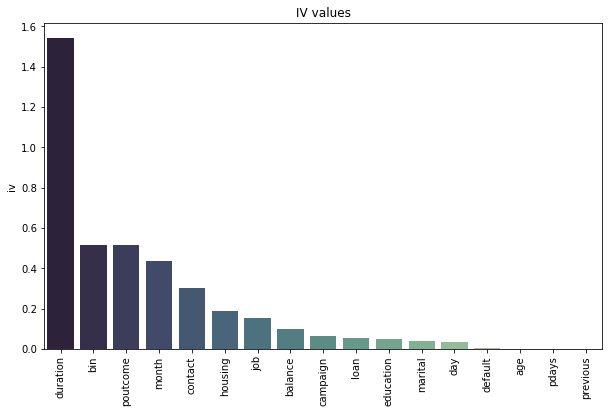

In [43]:
ar.draw_iv(feats, iv)

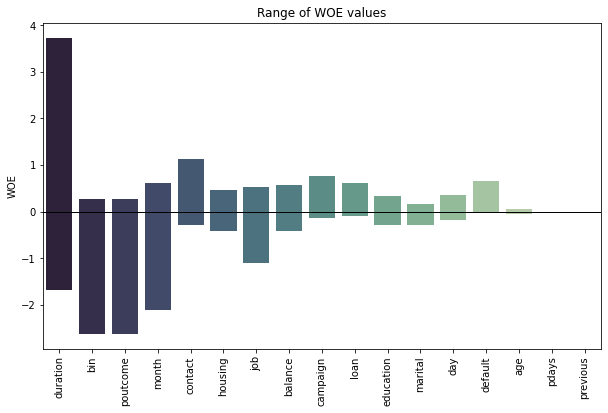

In [44]:
ar.draw_woe_extremes(feats, iv)

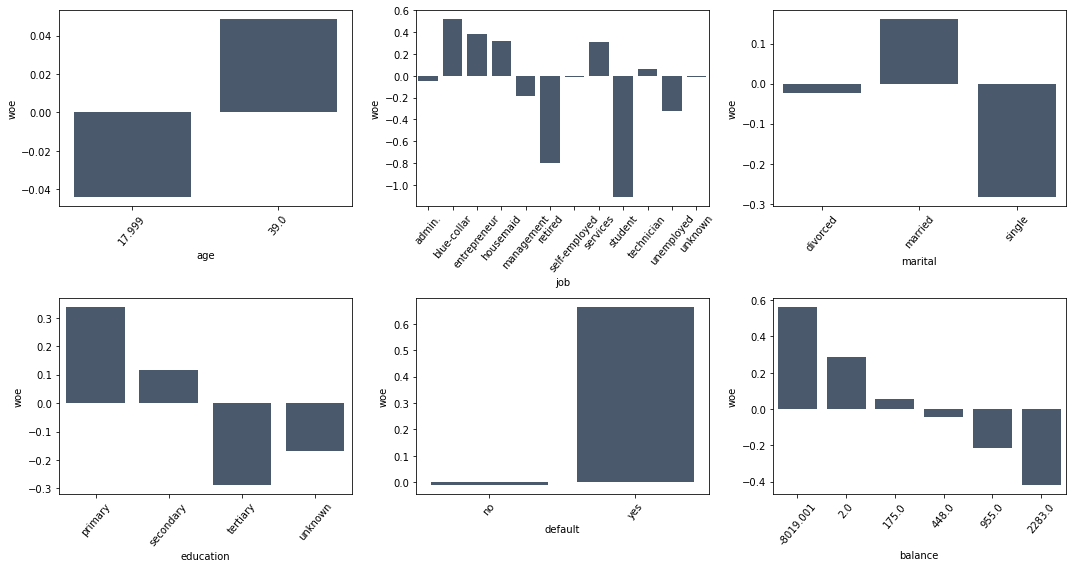

In [45]:
ar.draw_woe_multiplot(feats[:6], iv)
